# Planning writing and excuting ML experiment

## Problem

The objective of this lab work is to accurately predict whether a student will drop out or not. 

## Metric
The performance measure that will be used to judge will be the F1 measure.
The evaluation metric for this lab work is Mean F1-Score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favoured over extremely good performance on one and poor performance on the other.. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

## Data description
The data has been split into two groups:

- training set (train_data_week_1_challenge.csv)
- test set (test_data_week_1_challenge.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each student. Your model will be based on “features” like gender, caste   mathematics marks etc. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data.For each student in the test set, use the model you trained to predict whether or not they drop.



### Key issues

1. Understand your problem 
2. Understand your data
3. Write readable and reusable code
4. Use arg parse and logging module
5. Choose appropriate metric for your problem

In [105]:
# import important modules 
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import pyplot as plt
from matplotlib import rc, rcParams
from cycler import cycler
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn import preprocessing
%matplotlib inline

np.random.seed(7) 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning 

### Load and process data

In [106]:
data = pd.read_csv("../data/train.csv") 


In [107]:
# show the first five rows
data.head() 

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s17477,M,BC,0.393,0.338,0.393,2,2,mother,True,362,397,5.0,1950.0
1,continue,s16612,M,SC,0.745,0.645,0.745,4,3,father,True,357,57,14.0,1929.0
2,continue,s04010,M,BC,0.788,0.655,0.788,8,9,father,True,340,134,15.0,1976.0
3,drop,s11124,F,BC,0.623,0.699,0.623,6,0,father,True,345,143,28.0,1879.0
4,continue,s04384,M,SC,0.951,0.704,0.951,8,4,mother,True,304,390,28.0,1914.0


In [108]:
#show list of column
data.columns 

Index(['continue_drop', 'student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'],
      dtype='object')

In [109]:
# show data information  
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17190 entries, 0 to 17189
Data columns (total 15 columns):
continue_drop         17190 non-null object
student_id            17190 non-null object
gender                17190 non-null object
caste                 17190 non-null object
mathematics_marks     17190 non-null float64
english_marks         17190 non-null float64
science_marks         17190 non-null float64
science_teacher       17190 non-null int64
languages_teacher     17190 non-null int64
guardian              17190 non-null object
internet              17190 non-null bool
school_id             17190 non-null int64
total_students        17190 non-null int64
total_toilets         16881 non-null float64
establishment_year    16881 non-null float64
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 1.9+ MB


We have some object types columns

In [110]:
# check the shape of the data
data.shape 

(17190, 15)

In [111]:
## Check for missing values 
data.isnull().sum()*100/data.shape[0]  

continue_drop         0.000000
student_id            0.000000
gender                0.000000
caste                 0.000000
mathematics_marks     0.000000
english_marks         0.000000
science_marks         0.000000
science_teacher       0.000000
languages_teacher     0.000000
guardian              0.000000
internet              0.000000
school_id             0.000000
total_students        0.000000
total_toilets         1.797557
establishment_year    1.797557
dtype: float64

 One percent of data is missing in  total toilets and establishment year columns. Let ignore these columns by addding the following line in the load data function. We will also delete the student id column
 
 ```python
    data.drop(['total_toilets','establishment_year', 'student_id', 'school_id'], axis=1, inplace=True)
```

In [112]:
data.drop(['total_toilets','establishment_year'], axis=1, inplace=True)  

In [113]:
# check again your data
data.sample(5) 

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students
12788,continue,s09804,M,OC,0.214,0.684,0.214,4,3,mixed,True,369,387
509,continue,s15046,F,SC,0.332,0.289,0.332,5,10,mother,True,323,344
1222,continue,s14142,F,OC,0.480,0.457,0.480,2,9,mother,True,359,305
9545,continue,s17262,F,BC,0.390,0.511,0.390,4,10,mother,True,390,140
3528,continue,s00039,F,ST,0.563,0.626,0.563,2,6,mother,True,397,221


Drop School_id and student_id columns 

In [114]:
data.drop(['student_id','school_id'], axis=1, inplace=True)   

In [115]:
# check shape again
data.shape  

(17190, 11)

In [116]:
# convert object types into integer types 
le = preprocessing.LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['guardian'] = le.fit_transform(data['guardian'])
data['internet'] = le.fit_transform(data['internet'])
data['caste']  = le.fit_transform(data['caste'])
data['continue_drop']= le.fit_transform( data['continue_drop']) 

In [117]:
# let see some of our data again 
data.head() 

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students
0,0,1,0,0.393,0.338,0.393,2,2,2,1,397
1,0,1,2,0.745,0.645,0.745,4,3,0,1,57
2,0,1,0,0.788,0.655,0.788,8,9,0,1,134
3,1,0,0,0.623,0.699,0.623,6,0,0,1,143
4,0,1,2,0.951,0.704,0.951,8,4,2,1,390


In continue_drop column : 0 represent continue and 1 represent drop 

In [118]:
# check data information again 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17190 entries, 0 to 17189
Data columns (total 11 columns):
continue_drop        17190 non-null int32
gender               17190 non-null int32
caste                17190 non-null int32
mathematics_marks    17190 non-null float64
english_marks        17190 non-null float64
science_marks        17190 non-null float64
science_teacher      17190 non-null int64
languages_teacher    17190 non-null int64
guardian             17190 non-null int32
internet             17190 non-null int64
total_students       17190 non-null int64
dtypes: float64(3), int32(4), int64(4)
memory usage: 1.2 MB


### Check data Correlation 

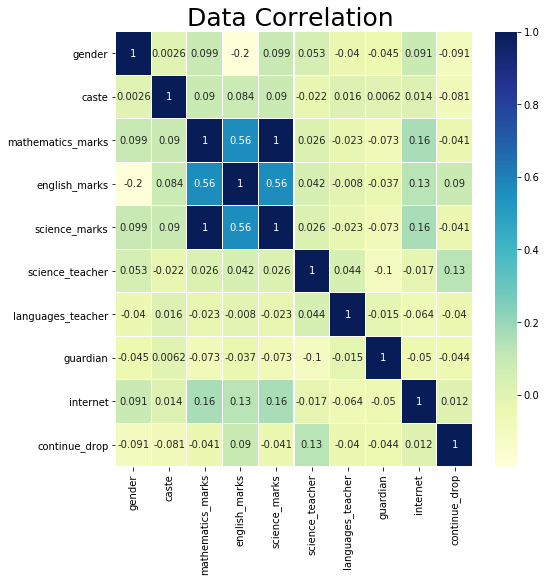

In [119]:
#create the correlation matrix heat map
plt.figure(figsize=(8,8))

plt.title("Data Correlation ", fontsize = 25)
sns.heatmap(valid.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);  

In [120]:
# check correlation again continue_drop column 
pd.DataFrame(abs(data.corr()['continue_drop']).sort_values(ascending = False))  

,continue_drop
continue_drop,1.000000
science_teacher,0.128843
english_marks,0.071767
internet,0.062536
caste,0.047252
gender,0.039699
languages_teacher,0.024269
guardian,0.018096
science_marks,0.006385
mathematics_marks,0.006385


It clear that all features except total students have contribution. So we will delete the total students feature 

In [121]:
data.drop(['total_students'], axis=1, inplace=True)    

### Check distribution of class

In [122]:
data.continue_drop.value_counts()

0    16377
1      813
Name: continue_drop, dtype: int64

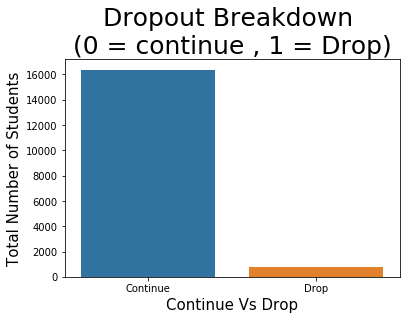

In [123]:
# Visualize the continue_drop column 
sns.countplot(data = data, x = 'continue_drop') 
plt.title("Dropout Breakdown \n (0 = continue , 1 = Drop) ", fontsize = 25)
plt.xlabel("Continue Vs Drop", fontsize = 15);
plt.ylabel("Total Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [0,1] 
plt.xticks(val, labels); 

It is cleary from the distribution the class is [imbalanced]. Different techniques can be applied to solve this problem as discussed [here](https://www.jeremyjordan.me/imbalanced-data/). For this problem I will use SMOTEN technique implemented in [imbalance learn library](https://github.com/scikit-learn-contrib/imbalanced-learn). We will only apply this techniques on train set. However we will apply this technique to training samples and not on validation sample. Let first split the into training and validation.

In [124]:
train, valid = np.split(data.sample(frac=1), [int(.9*len(data))])

In [125]:
# check shape for train data
train.shape 

(15471, 10)

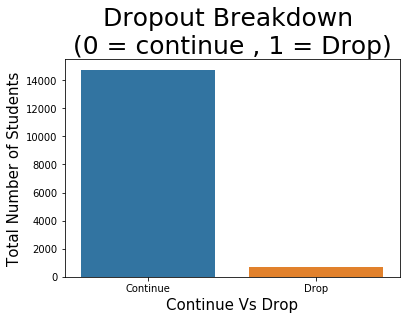

In [126]:
# visualize train data in continue_drop column 
sns.countplot(data = train, x = 'continue_drop') 
plt.title("Dropout Breakdown \n (0 = continue , 1 = Drop) ", fontsize = 25)
plt.xlabel("Continue Vs Drop", fontsize = 15);
plt.ylabel("Total Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [0,1] 
plt.xticks(val, labels);

In [127]:
#check shape for valid data 
valid.shape   

(1719, 10)

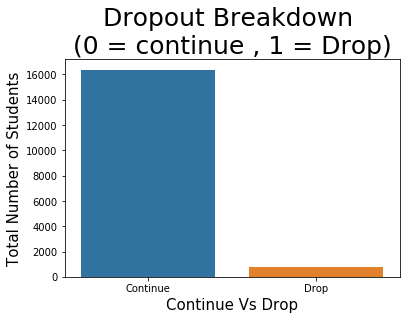

In [92]:
# visualize valid data in continue_drop column 
sns.countplot(data = data, x = 'continue_drop') 
plt.title("Dropout Breakdown \n (0 = continue , 1 = Drop) ", fontsize = 25)
plt.xlabel("Continue Vs Drop", fontsize = 15);
plt.ylabel("Total Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [0,1] 
plt.xticks(val, labels);

In [128]:
# import important module to ge balanced data in train data 
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN 

In [129]:
# function to get balanced data in our train data
def get_balanced_data(df):
    y = df['continue_drop'].values
    X = df[feature_columns].values
    smote = SMOTEENN(random_state=0)
    X, y = smote.fit_sample(X, y)    
    return X, y     

In [130]:
feature_columns = ['gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet'] 

In [131]:
X_train, y_train = get_balanced_data(train) 

In [133]:
#convert into Dataframe
X_train = pd.DataFrame(X_train, columns=feature_columns) 

y_train = pd.DataFrame(y_train, columns=["continue_drop"])


In [134]:
# concat and save train data into the csv file 
results = pd.concat([X_train, y_train], axis=1)

results.to_csv("../data/data_for_train.csv", index=False) 

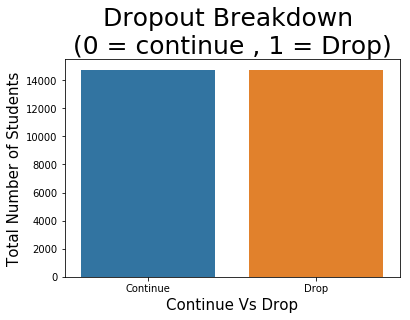

In [135]:
# Let's visualize train data again 
sns.countplot(data = results, x = 'continue_drop') 
plt.title("Dropout Breakdown \n (0 = continue , 1 = Drop) ", fontsize = 25)
plt.xlabel("Continue Vs Drop", fontsize = 15);
plt.ylabel("Total Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [0,1] 
plt.xticks(val, labels);

Our train data is now balanced 

In [136]:
#rearange columns in valid data 
feature_columns = ['gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet','continue_drop']

valid = valid[feature_columns]
valid.head() 

,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,continue_drop
10767,0,0,0.594,0.511,0.594,6,7,0,1,1
9280,1,2,0.523,0.522,0.523,7,10,2,1,0
7909,0,0,0.408,0.798,0.408,9,5,2,1,1
3371,1,0,0.781,0.474,0.781,7,7,2,0,0
12089,1,3,0.749,1.010,0.749,4,6,0,1,1


In [137]:
# save our valid data into csv file 
valid.to_csv("../data/data_for_validation.csv", index=False) 

In [139]:
df = load_test_data("../data/test.csv") 